In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import  MinMaxScaler,StandardScaler, LabelEncoder,RobustScaler
import seaborn as sns
import re

In [14]:
data=pd.read_csv(r"E:\internship(autointelli)\project2\foodhub_order.csv")
print(data.head())

In [15]:
print(data.describe())



In [16]:


print(data.drop_duplicates().sum())
data=data.drop_duplicates()

In [17]:

data=data.replace('Not given',np.nan)
print(data.isnull().sum())


In [18]:
#adding indicator
data['rating_missing']=data['rating'].isnull().astype(int)
data.head(5)

In [19]:
#label encoding(weekend =1,weekday =0)
label=LabelEncoder()
data['day_of_the_week']=label.fit_transform(data['day_of_the_week'])
data.head(5)

In [20]:
#ordinal encoding 
data['cuisine_type'] = data['cuisine_type'].map({
    'Korean': 1,
    'Japanese': 2,
    'American': 3,
    'Mexican': 4,
    'Indian': 5,
    'French': 6,
    'Southern': 7,
    'Middle Eastern': 8,
    'Chinese': 9,
    'Italian': 10,
    'Thai': 11,
    'Mediterranean': 12
})
data.head(5)

In [21]:
#minMaxscaler
# Sample data (list of cost_of_order values)
cost_of_order = data['cost_of_the_order']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape the list to a 2D list (required for fit_transform)
reshaped_data = [[x] for x in cost_of_order]

# Fit and transform the data
scaler_data = scaler.fit_transform(reshaped_data)

# Flatten the result to get a 1D array
scaler_data = scaler_data.flatten()

# Display the scaled values
print(scaler_data)


In [22]:
df = pd.DataFrame(data)

# Selecting only numeric columns for scaling
numeric_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply the scaler to the numeric data
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the scaled data
print(df)

In [23]:
#Roust scalar
scaler = RobustScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display the scaled data
print(df)

In [24]:
#z score outlier
df['z_score'] = zscore(df['value'])

# Outliers if z-score > 3 or < -3
outliers_zscore = df[df['z_score'].abs() > 3]

print("Outliers based on Z-Score:")
print(outliers_zscore)

Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64
Number of duplicate rows dropped: 0
Scaled data sample:
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO     LSTAT      MEDV  CHAS_encoded  
0  0.000000  0.208015  0.287234  0.089680  0.422222           0.0  
1  0.043478  0.104962  0.553191  0.204470  0.368889           0.0  
2  0.043478  0.104962  0.553191  0.063466  0.660000           0.

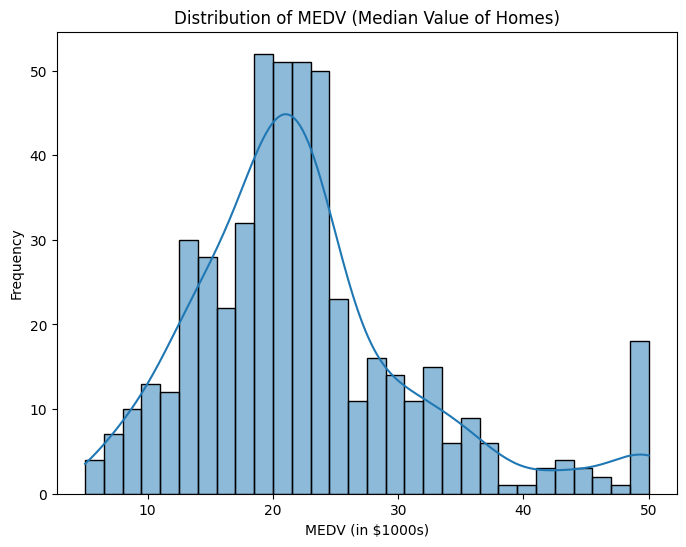

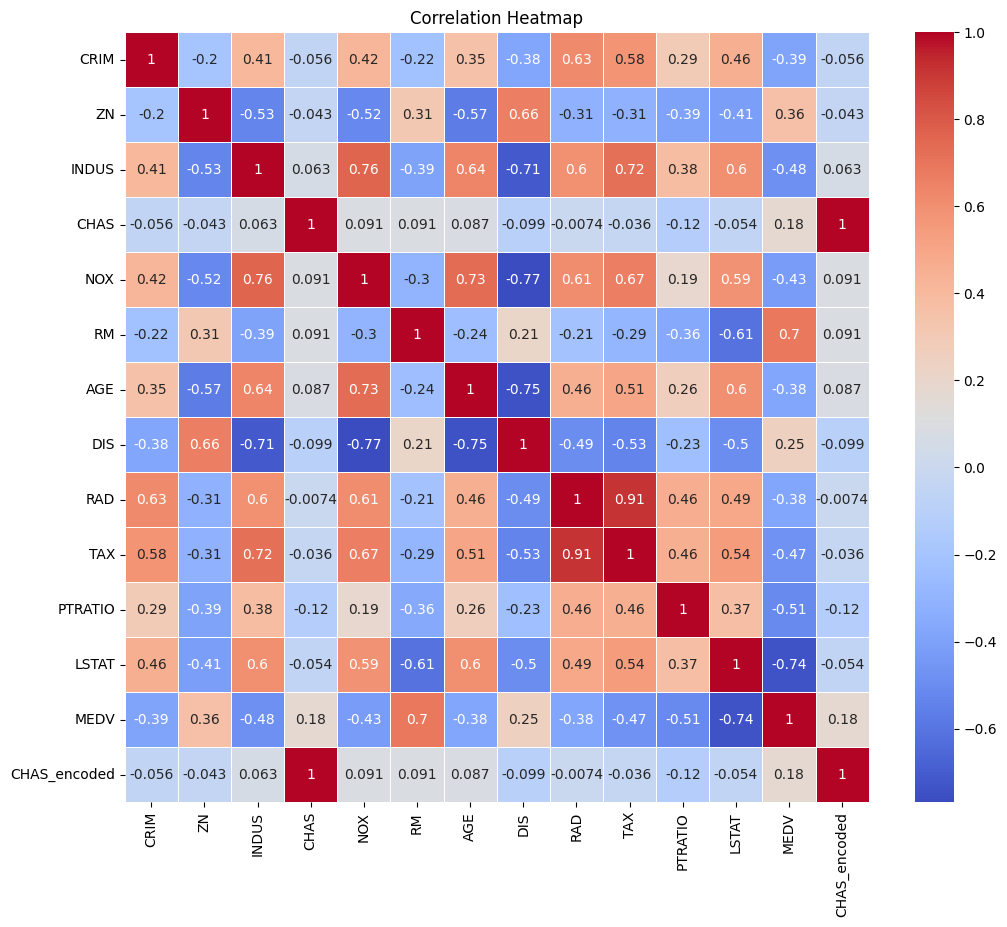

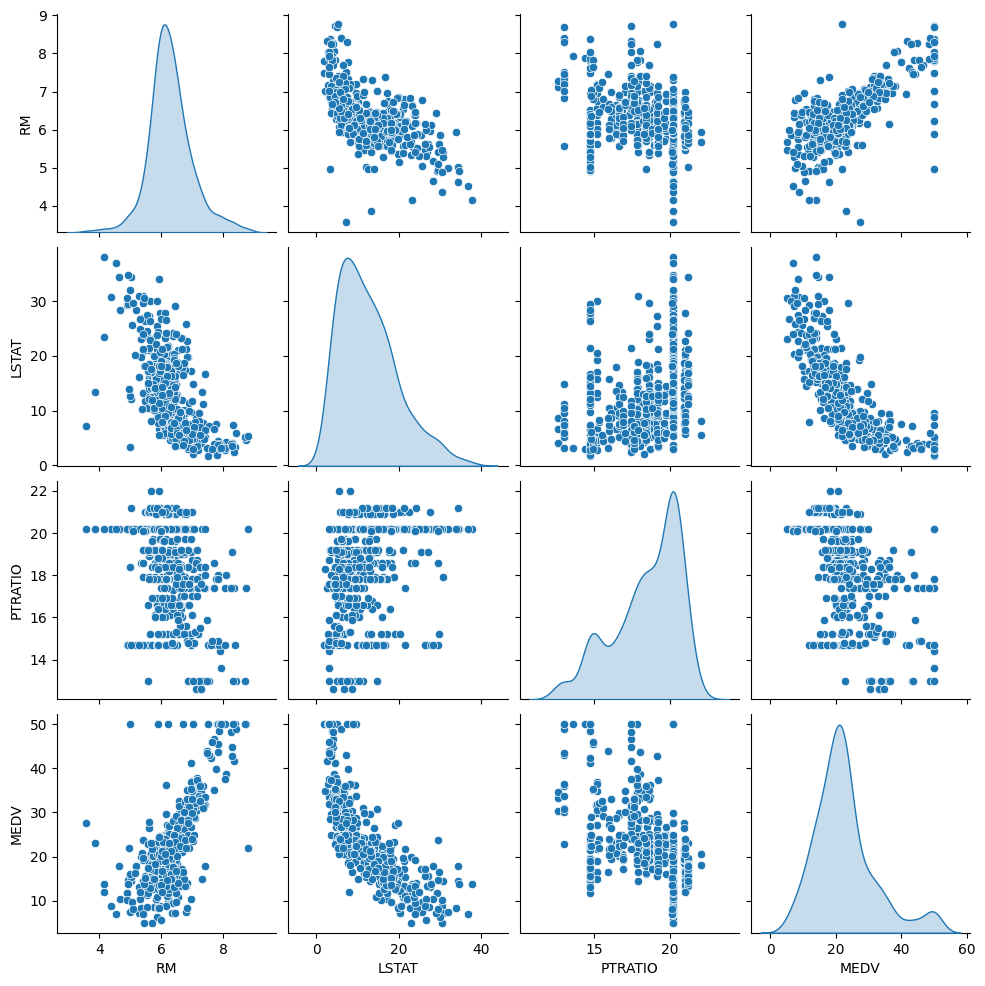

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

# Load the Boston housing dataset from the specified file location
file_path = 'E:\\internship(autointelli)\\boston\\Boston.csv'
boston_df = pd.read_csv(file_path)
df=pd.DataFrame(boston_df)

# Check for missing values
missing_values = boston_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop duplicate rows
boston_df = boston_df.drop_duplicates()
print("Number of duplicate rows dropped:", boston_df.duplicated().sum())

# Add indicators for missing values (if any)
for column in boston_df.columns:
    if boston_df[column].isnull().sum() > 0:
        boston_df[column + '_missing'] = boston_df[column].isnull().astype(int)

# Fill missing values (if any) with median
boston_df = boston_df.fillna(boston_df.median())

# Encode categorical variables if present (dummy example)
# Assume 'CHAS' is a categorical variable for this example
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# Example encoding for 'CHAS' (binary categorical)
boston_df['CHAS_encoded'] = label_encoder.fit_transform(boston_df['CHAS'])

# Scale numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(boston_df.select_dtypes(include=['float64', 'int64']))
boston_df_scaled = pd.DataFrame(scaled_features, columns=boston_df.select_dtypes(include=['float64', 'int64']).columns)

# Check the transformed data
print("Scaled data sample:")
print(boston_df_scaled.head())

# Plot the distribution of the target variable (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV (in $1000s)')
plt.ylabel('Frequency')
plt.show()

# Plot heatmap for correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = boston_df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
sns.pairplot(boston_df[selected_features], diag_kind='kde')
plt.show()


In [32]:
type(data)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Distribution of cost_of_the_order
plt.figure(figsize=(20, 6))
sns.histplot(df['cost_of_the_order'], kde=True, color='blue')
plt.title('Distribution of Cost of the Order', fontsize=16)
plt.xlabel('Cost of the Order', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualization: Delivery time by cuisine type
plt.figure(figsize=(20, 6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df, palette='Set3')
plt.title('Delivery Time by Cuisine Type', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Visualization: Average preparation time during weekdays vs. weekends
avg_prep_time = df.groupby('day_of_the_week')['food_preparation_time'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_the_week', y='food_preparation_time', data=avg_prep_time, palette='coolwarm')
plt.title('Average Food Preparation Time by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Preparation Time (minutes)', fontsize=12)
plt.show()


In [37]:
from scipy.stats import ttest_ind

# Prepare data for t-test: Weekday vs. Weekend preparation times
weekday_prep_time = df[df['day_of_the_week'] == 'Weekday']['food_preparation_time']
weekend_prep_time = df[df['day_of_the_week'] == 'Weekend']['food_preparation_time']

# Two-sample t-test
t_stat, p_value = ttest_ind(weekday_prep_time, weekend_prep_time, equal_var=False)  # Welch's t-test

print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")


In [3]:
# Group delivery times by cuisine and check sample sizes
group_sizes = df.groupby('cuisine_type')['delivery_time'].size()
valid_cuisines = group_sizes[group_sizes > 1].index

# Filter cuisines with sufficient data
filtered_df = df[df['cuisine_type'].isin(valid_cuisines)]

# Prepare data for F-test
filtered_cuisine_groups = [
    group['delivery_time'].values for _, group in filtered_df.groupby('cuisine_type')
]

# Check the number of valid groups
print(f"Number of valid groups: {len(filtered_cuisine_groups)}")
print(f"Sizes of each group: {[len(group) for group in filtered_cuisine_groups]}")

# Perform F-test only if at least two groups are present
if len(filtered_cuisine_groups) >= 2:
    from scipy.stats import f_oneway
    f_stat, f_p_value = f_oneway(*filtered_cuisine_groups)
    print(f"F-Test Results: F-statistic = {f_stat}, p-value = {f_p_value}")
else:
    print("Not enough groups with sufficient data for F-test.")


KeyError: 'cuisine_type'